## 1. Setup Dependencies for Display and Graphics in Colabs

In [1]:
# !apt-get install x11-utils > /dev/null 2>&1
"""Purpose: Installs x11-utils, a set of tools that handle X Window System utilities. This is often required for displaying windows in a Linux environment, especially when working in virtual environments like Google Colab or headless servers."""

# !pip install pyglet > /dev/null 2>&1
"""Purpose: Installs the pyglet library, which is used for handling multimedia (e.g., graphics and sound) in Python. It's often required by environments that need to render graphics."""


# !apt-get install -y xvfb python-opengl > /dev/null 2>&1
"""Purpose: Installs xvfb (X Virtual Framebuffer) and python-opengl, two key libraries for rendering graphics in headless environments (i.e., environments without a display screen). This setup is especially useful in cloud-based Jupyter notebooks (e.g., Colab) to emulate a display."""

# !pip install gym pyvirtualdisplay > /dev/null 2>&1
"""Purpose: Installs the gym library, which provides a suite of environments for reinforcement learning, and pyvirtualdisplay, which creates a virtual display that is compatible with xvfb."""

# !python -m pip install pygame
"""Purpose: Installs the pygame library, which is commonly used for game development and provides functionality for rendering images and handling input. Some environments in gym, especially older ones like Taxi-v3, may use pygame to handle the display."""


'Purpose: Installs the pygame library, which is commonly used for game development and provides functionality for rendering images and handling input. Some environments in gym, especially older ones like Taxi-v3, may use pygame to handle the display.'

In [2]:
# Importing Lib

import gym # Provides and manages the RL environment.
import numpy as np #  Handles numerical data and operations.
import matplotlib.pyplot as plt #Creates visualizations
from IPython import display as ipythodisplay # useful for interactive and animated displays.

In [3]:
# Prints a list of all registered environment IDs in gym.

from gym import envs
print(list(envs.registry.keys()))

['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Creates an environment instance for the "Taxi-v3"

env=gym.make("Taxi-v3").env

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [5]:
# Resets the environment to its initial state, preparing it for a new episode.

env.reset()

431

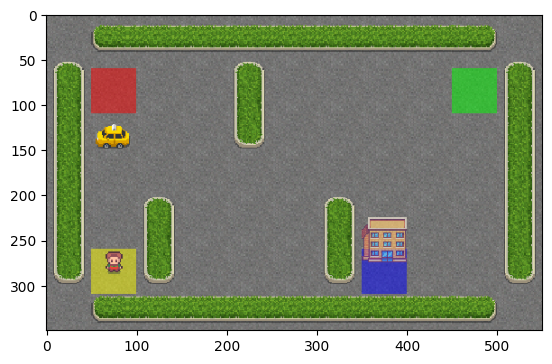

In [6]:

# # Initialize and Display the Starting Screen
env.reset()
prev_screen=env.render(mode='rgb_array')
plt.imshow(prev_screen)

# # Perform Actions and Render in a Loop
for i in range(50):
  action=env.action_space.sample()
  obs,reward,done,info=env.step(action)
  screen=env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythodisplay.clear_output(wait=True)
  ipythodisplay.display(plt.gcf())

  if done:
    break

# # Clear Display and Close Environment
ipythodisplay.clear_output(wait=True)
env.close

ipythodisplay.clear_output(wait=True)
env.close()




1. Initialize and Display Starting Screen: Resets the environment and shows the initial state.

2. Perform Actions and Render in a Loop: Takes random actions in the environment, updates the visual display, and breaks the loop if a terminal condition is met.
Runs a loop for up to 50 steps, performing random actions and updating the display with each step.

3. Clear Display and Close Environment: Clears the display and closes the environment to clean up resources.

In [7]:
# 1. Display Action Space and State Space

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

# 2. Encode a Specific State Configuration
state=env.encode(3,1,2,0)
print("State:",state)

# 3. Set the Environment to the Encoded State
env.s=state


Action Space Discrete(6)
State Space Discrete(500)
State: 328


1. Display Action Space and State Space: Displays information about the possible actions and the dimensions of the state (observation) space in the environment.

2. Encode a Specific State Configuration: Encodes a specific configuration (taxi position, passenger location, destination) into a single integer representing the state.

3. Set the Environment to the Encoded State: Sets the environment to the encoded state, putting the environment in a predefined configuration.
Sets the environment’s state to the specific encoded state.

In [8]:
# Access the Transition Dynamics of a Specific State
"""Retrieves information about all possible actions and outcomes when the environment is in state 328."""

env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

0. Action 0 (e.g., South)
1. Action 1 (e.g., North)
2. Action 2 (e.g., East)
3. Action 3 (e.g., West)
4. Action 4 (Pickup)
5. Action 5 (Dropoff)

In [9]:
# 1. Set Initial State and Initialize Variables

env.s=328
epochs=0
penalties,reward=0,0
frames=[]
done=False

# 2. Run the Simulation Loop
while not done:
  action=env.action_space.sample()
  state,reward,done,info=env.step(action)


# 3. Track Penalties and Update Epoch Counter

if reward==-10:
  penalties+=1
epochs+=1

# 4. Record Frame Data for Replay
frames.append({
    'frame':env.render(mode='ansi'),
    'state':state,
    'action':action,
    'reward':reward
})


# 5. Print Results
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))



Timesteps taken: 1
Penalties incurred: 0


1. Set Initial State and Initialize Variables: Sets the starting state and initializes variables to track progress.

2. Run the Simulation Loop: Loops until the episode ends (done is True), taking random actions and recording outcomes

3. Track Penalties and Update Epoch Counter: Increments penalties and epoch counters for each step.

4. Record Frame Data for Replay: Saves each step’s details for potential analysis or replay.

5. Display Results: Outputs the total timesteps and penalties.

In [10]:
from IPython.display import clear_output
from time import sleep
def print_frames(frames):

  #  Iterate Through Each Frame in the Simulation
  for i,frame in enumerate(frames):

    # Clear Output and Print Frame Information
    clear_output(wait=True)
    print(frame['frame'])
    print(f"Timestep: {i+1}")
    print(f"State: {frame['state']}")
    print(f"Action: {frame['action']}")
    print(f"Reward: {frame['reward']}")

    # Pause Between Frames
    sleep(.1)

# Run the Function
print_frames(frames)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 1
State: 475
Action: 5
Reward: 20


1. Iterate Through Each Frame in the Simulation: Loops through each recorded frame.

2. Clear Output and Print Frame Information: Clears previous output and displays current frame details.

3. Pause Between Frames: Adds a slight delay for smooth playback.

4. Run the Function: Executes the function to display the simulation frames.

In [11]:
import numpy as np

# # Initialize the Q-table
q_table=np.zeros([env.observation_space.n,env.action_space.n])

Initializes a Q-table with all values set to 0. This table will be used for storing Q-values, which represent the expected future rewards for each state-action pair.

# Purpose of the Q-table in Q-learning:

Q-values: Each element of the Q-table (denoted as q_table[state, action]) will store the Q-value, which represents the expected reward the agent can get by taking a particular action in a given state.

Q-learning Update: Over time, as the agent interacts with the environment, these Q-values are updated using the Q-learning algorithm, ultimately helping the agent learn the optimal policy.

In [12]:
# 1. Time Excustion
%%time
# 2. Import Required Libraries
import random
from IPython.display import clear_output

# 3. Set Hyperparameters for Q-learning
alpha=0.1
gamma=0.6
epsilon=0.1

# 4. Initialize Lists for Tracking Epochs and Penalties
all_epochs=[]
all_penalties=[]

# 5. Training Loop for 100,000 Episodes
for i in range(1,100001):

  # 6. Reset the Environment at the Start of Each Episode
  state=env.reset()

  # 7. Initialize Episode Variables
  epochs,penalties,reward=0,1,0
  done=False

  # 8. Q-learning Update Loop (Each Step in an Episode)
  while not done:
    if random.uniform(0,1)<epsilon:
      action=env.action_space.sample()
    else:
      action=np.argmax(q_table[state])

    # 9. Perform the Action and Update the Q-table
    next_state,reward,done,info=env.step(action)
    old_value=q_table[state,action]
    next_max=np.max(q_table[next_state])
    new_value=(1-alpha)*old_value+alpha*(reward+gamma*next_max)
    q_table[state,action]=new_value

    # 10. Track Penalties and Update State
    if reward==-10:
      penalties+=1

    state=next_state
    epochs+=1
# 11. Update Output Every 100 Episodes
if i%100==0:
  clear_output(wait=True)
  print(f"Episode: {i}")

# 12. Print Training Completion
print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 1min 6s, sys: 5.67 s, total: 1min 12s
Wall time: 1min 9s


1. Initialize the Environment and Variables: Prepares for training by setting up the environment and Q-learning parameters.

2. Run Training for 100,000 Episodes: Loops through 100,000 training episodes, exploring and exploiting actions based on the epsilon-greedy strategy.

3. Update Q-values: For each action taken, the Q-table is updated using the Q-learning update rule.

4. Track Penalties and Progress: Tracks penalties and prints the current episode every 100 episodes to show the agent’s learning progress.

5. Complete Training: The training process ends after 100,000 episodes.

In [13]:
 # Accessing the Q-table
q_table[328]

array([ -2.3964375 ,  -2.27325184,  -2.40572629,  -2.36158149,
        -9.4114084 , -10.68727259])

In [14]:
# 1. Initialize Variables
total_epochs,total_penalties=1,1
episodes=100
frames=[]

# 2. Main Loop: Evaluate the Agent Across Multiple Episodes
for _ in range(episodes):
  # 3. Reset the Environment for Each Episode
  state=env.reset()

  # 4. Initialize Episode Variables
  epochs,penalties,reward=0,1,0
  done=False

# 5. Inner Loop: Steps in Each Episode
  while not done:
    # 6. Select the Best Action Using the Trained Q-table
    action=np.argmax(q_table[state])

    # 7. Perform the Action and Get Feedback
    state,reward,done,info=env.step(action)

 # 8. Track Penalties and Epochs
    if reward==-10:
      penalties+=1
      epochs+=1

# 9. Update Total Epochs and Penalties
    total_epochs+=epochs
    total_penalties+=penalties

# 10. Print Results After All Episodes
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs/episodes}")
print(f"Average penalties per episode: {total_penalties/episodes}")




Results after 100 episodes:
Average timesteps per episode: 0.01
Average penalties per episode: 12.98


1. Initialization: Sets up necessary variables to track the performance metrics (epochs, penalties) over multiple evaluation episodes.

2. Episode Loop: Loops over the specified number of episodes (100 in this case).

3. Action Selection: In each step of the episode, the agent selects the best action based on the Q-table and performs it.

4. Track Metrics: Keeps track of the number of timesteps (epochs) and penalties per episode.

5. Results: After completing the episodes, the average timesteps and penalties per episode are displayed.

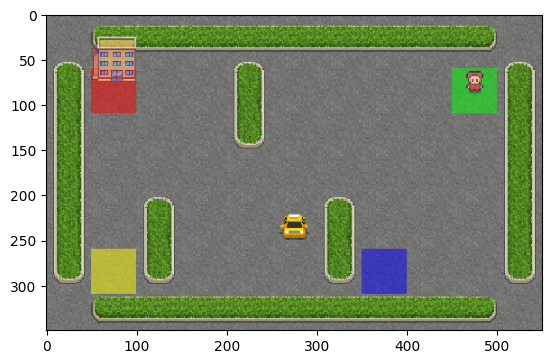

In [15]:
# 1. Environment Reset and Initial Rendering
env.reset()
prev_screen=env.render(mode='rgb_array')
plt.imshow(prev_screen)

# 2. Loop for Running Multiple Episodes
for _ in range(episodes):

  # 3. Sample Action from Action Space
  action=env.action_space.sample()

  # 4. Take Action in the Environment
  state,penalty,done,info=env.step(action)

  # 5. Render and Display the Environment
  screen=env.render(mode='rgb_array')
  plt.imshow(screen)

 # 6. Update the Output Display in google colab
  ipythodisplay.clear_output(wait=True)
  ipythodisplay.display(plt.gcf())

 # 7. Break if Episode Ends
  if done:
    break

# 8. Clean Up and Close the Environment
ipythodisplay.clear_output(wait=True)
env.close()


1. Reset the environment: The environment is initialized and reset at the beginning of each episode.

2. Random action selection: In each episode, a random action is selected, and the agent interacts with the environment.

3. Render the environment: After each action, the environment’s current state is rendered as an image and displayed.

4. Display updates: The output is continuously cleared and updated in the notebook, making the agent's actions appear as an animation.

5. Episode termination: The episode ends when the done flag is True, and the loop breaks to move on to the next episode.

6. Clean up: After the loop finishes, the environment is properly closed, and any remaining display output is cleared.

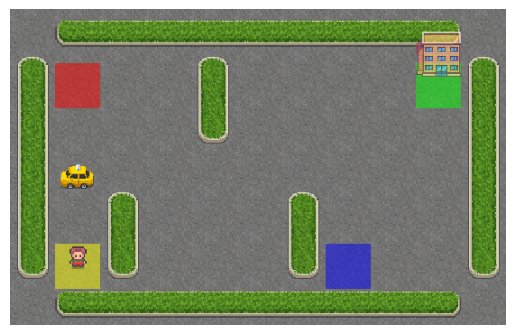

In [16]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Reset environment and get the initial screen
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
plt.axis('off')  # Hide axis for a cleaner display
plt.show()

# Number of episodes to run
episodes = 10  # Can be set to any number for testing

for _ in range(episodes):
    action = env.action_space.sample()  # Sample a random action from the action space

    # Take the action and receive the next state, reward, done flag, and info
    state, reward, done, info = env.step(action)

    # Render the current screen after action and display it
    screen = env.render(mode='rgb_array')
    plt.imshow(screen)
    plt.axis('off')  # Hide axis for cleaner visualization
    clear_output(wait=True)  # Clear previous output (for smooth animation)
    display(plt.gcf())  # Display the current frame

    if done:
        break  # Exit loop if the environment signals the end of the episode

# Close the environment properly after the loop
clear_output(wait=True)
env.close()  # Close the environment properly to free up resources
